IMPORTING THE LIBRARIES:

In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATASET:

In [124]:
dset= pd.read_csv("C:\\Users\\Karthika\\Documents\\IMDb.csv", encoding='latin1')
dset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


PRINTING FIRST TEN ROWS IN THE DATASET:

In [125]:
dset.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


PRINTING LAST TEN ROWS IN THE DATASET:

In [126]:
dset.tail(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15489,Zor Lagaa Ke... Haiya!,(2009),NaN,"Comedy, Drama, Family",6.1,59,Girish Girija Joshi,Meghan Jadhav,Mithun Chakraborty,Riya Sen
15490,Zor: Never Underestimate the Force,(1998),157 min,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15491,Zordaar,(1996),NaN,Action,4.7,29,Ajay Kashyap,Mahesh Anand,Vikas Anand,Bob Christo
15492,Zorro,(1975),150 min,"Action, Adventure, Comedy",5.6,33,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15495,Zulf Ke Saye Saye,(1983),NaN,NaN,NaN,NaN,Anand Sagar,Roohi Berde,Rakesh Pandey,NaN
15496,Zulm Aur Inteqaam,(1986),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15497,Zulm Hi Zulm,(1996),NaN,Drama,NaN,NaN,Ved Prakash,Akashdeep,Huma Khan,Amita Nangia
15498,Zulm Ka Badla,(1985),NaN,"Action, Crime, Drama",4.9,11,Chand,K. Prasad,Rakesh Roshan,Anita Raj


In [127]:
dset.shape

(15509, 10)

DESCRIBING THE DATASET:

In [128]:
dset.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


RETRIEVING INFORMATION FROM THE DATASET (about datatypes of each columns & the count of non-null values):

In [129]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


PRINTING ALL COLUMNS IN THE DATASET:

In [130]:
dset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

DATA FILTERING AND PREPROCESSING:

In [131]:
dset.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [132]:
print(dset['Rating'].value_counts())

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


DROPPING ALL THE UNREQUIRED VALUES:

In [133]:
dset.drop_duplicates(inplace=True)

In [156]:
attributes=['Name' , 'Year' , 'Duration' , 'Votes' , 'Rating']
dset.dropna(subset=attributes,inplace=True)
missing_values=dset.isna().sum()
print(missing_values)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     162
dtype: int64


PRINTING THE DATASET AFTER DROPING NULL VALUES:

In [135]:
dset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [158]:
dset['Duration'] = pd.to_numeric(dset['Duration'], errors='coerce')  
print(dset['Duration'].isnull().sum())

0


DISPLAYING THE NAME OF THE MOVIES HAVING DURATION GREATER THAN OR EQUAL TO 180 MINUTES:

In [159]:
dset[dset['Duration']>=180]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
63,23rd March 1931: Shaheed,2002.0,188.0,"Biography, Drama, History",5.1,642.0,Guddu Dhanoa,Bobby Deol,Sunny Deol,Amrita Singh
239,Aag Ka Gola,1990.0,180.0,"Action, Drama",4.8,101.0,David Dhawan,Sunny Deol,Dimple Kapadia,Archana Puran Singh
451,Aar Ya Paar,1997.0,180.0,Thriller,6.1,230.0,Ketan Mehta,Jackie Shroff,Deepa Sahi,Ritu Shivpuri
455,Aaravalli,1957.0,210.0,Horror,5.9,7.0,Varalakshmi G.,NaN,NaN,NaN
490,Aasma: The Sky Is the Limit,2009.0,240.0,Drama,3.8,46.0,Rohit Krishnakant Nayyar,Hrishitaa Bhatt,Seema Biswas,Nauheed Cyrusi
...,...,...,...,...,...,...,...,...,...,...
14854,Vidhyaarthi: The Power of Students,2006.0,250.0,Action,5.2,12.0,Rakesh Kakaria,Chand Mehta,Vikram Aditya,Akash Ajmera
14938,Vivekananda,1998.0,240.0,"Biography, Drama",6.6,144.0,G.V. Iyer,Sarvadaman Banerjee,Mithun Chakraborty,Rakhee Gulzar
14955,Wafadaar,1985.0,190.0,"Comedy, Drama",4.5,31.0,Narayana Rao Dasari,Pilla Srinivas,Rajinikanth,Padmini Kolhapure
14968,Wajood,1998.0,180.0,"Action, Crime, Drama",6.9,584.0,N. Chandra,Nana Patekar,Madhuri Dixit,Mukul Dev


DISPLAYING THE YEAR WHERE THERE WAS THE HIGHEST AVERAGE VOTING:

Year
2003.0    255.100000
2002.0    248.822581
2008.0    244.823529
2009.0    240.611765
2006.0    239.927536
1999.0    237.074074
2005.0    236.287234
2013.0    235.522936
2010.0    234.780488
2007.0    229.253731
Name: Votes, dtype: float64


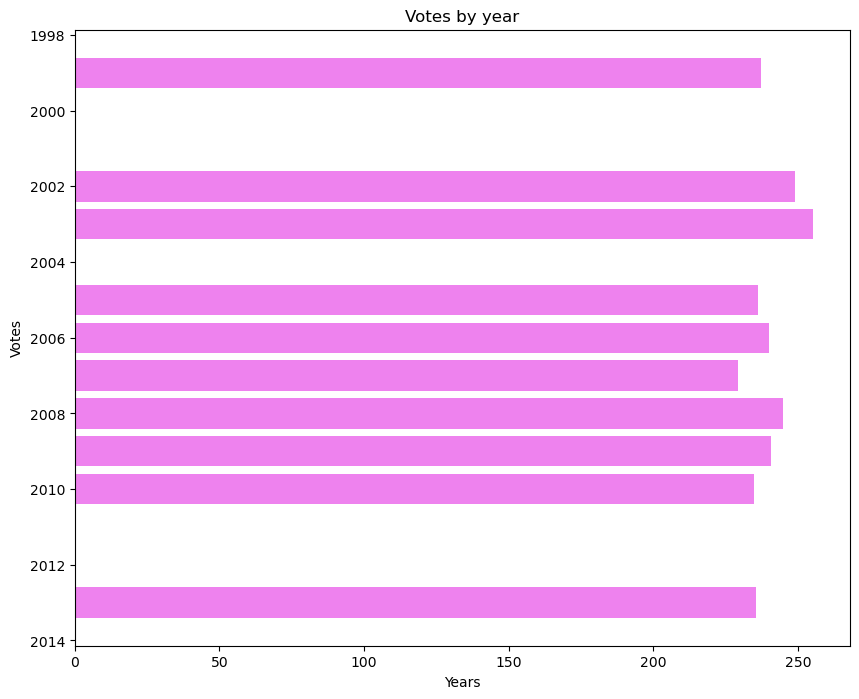

In [162]:
dset.reset_index(inplace=True)
avg_votes=dset.groupby('Year')['Votes'].mean().sort_values(ascending=False).head(10)
print(avg_votes)
fig=plt.figure(figsize=(10,8))
plt.barh(avg_votes.index,avg_votes.values,color="violet")
plt.xlabel('Years')
plt.ylabel('Votes')
plt.title("Votes by year")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#by the above bargraph we can see that the year 2003 has the highest average voting.

VISUALIZING TOP 10 HIGHLY RATED MOVIES:

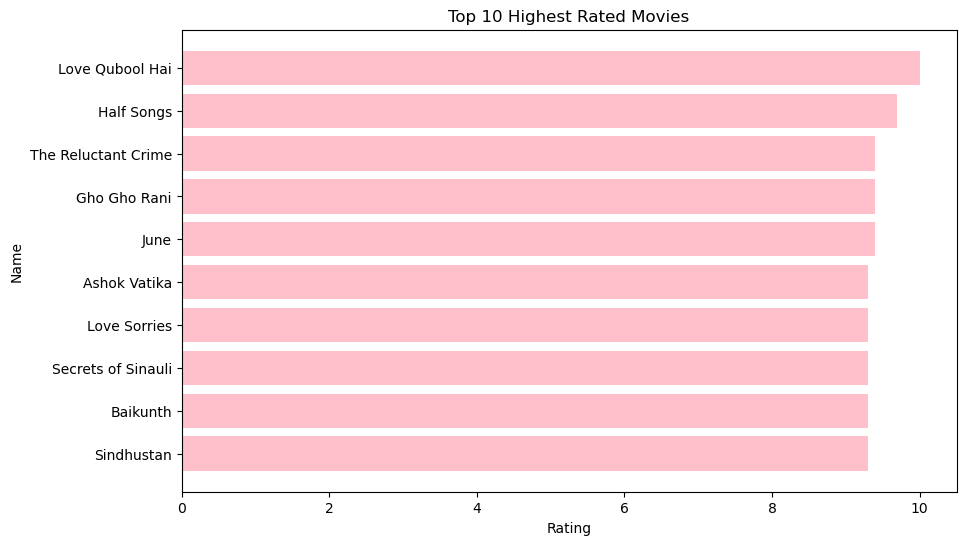

In [154]:
top_rated_movies=dset.sort_values(by="Rating", ascending=False).head(10)
fig=plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color="pink")
plt.xlabel('Rating')
plt.ylabel('Name')
plt.title("Top 10 Highest Rated Movies")
plt.gca().invert_yaxis()
plt.show()

VISUALIZING THE COUNT OF VOTES WITH THE RATINGS:

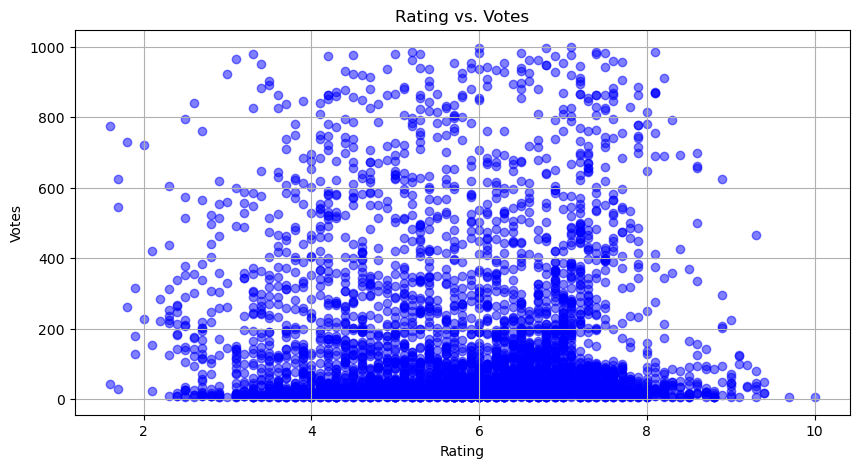

In [153]:
dset['Votes']=pd.to_numeric(dset['Votes'],errors='coerce')
plt.figure(figsize=(10,5))
plt.scatter(dset['Rating'],dset['Votes'],alpha=0.5,color="blue")
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs. Votes')
plt.grid(True)
plt.show()

VISUALIZING TOP 10 ACTORS BASED ON THE NUMBER OF MOVIES THEY PERFORMED:

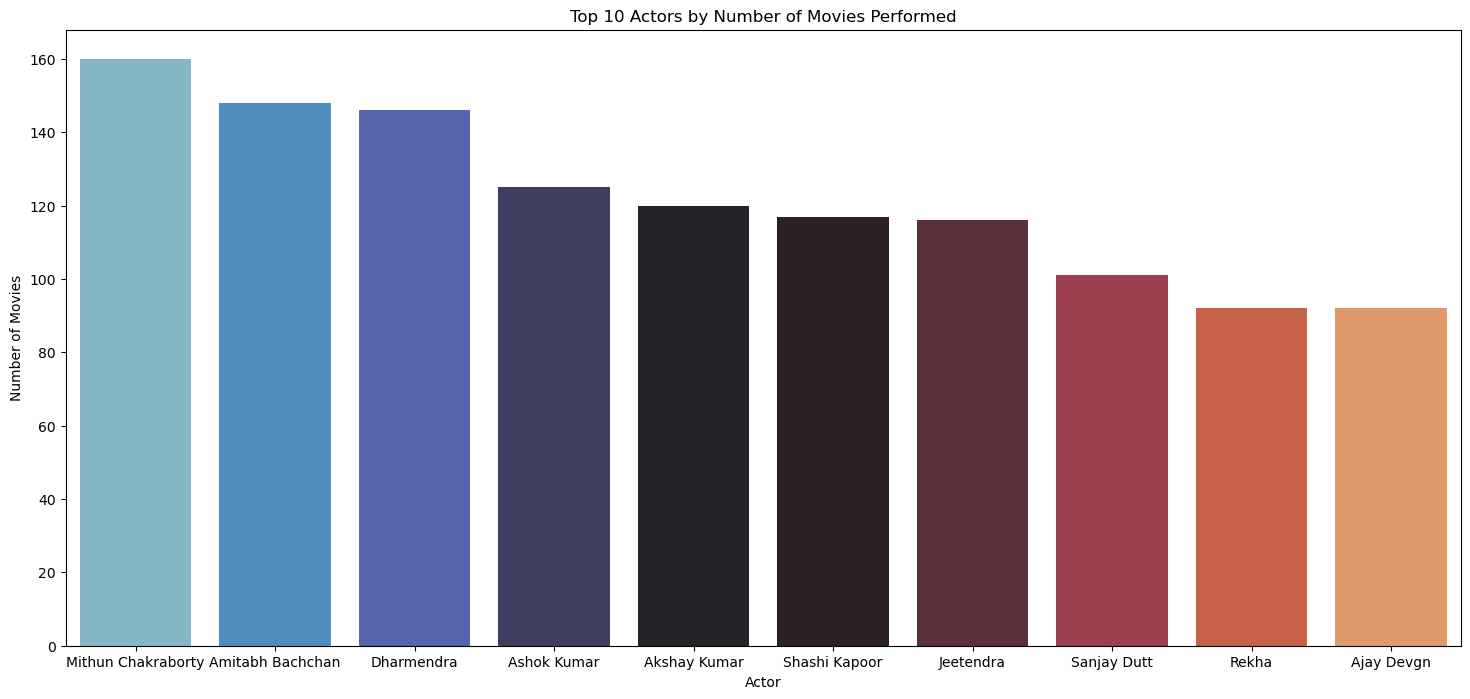

In [152]:
actors=pd.concat([dset['Actor 1'],dset['Actor 2'],dset['Actor 3']])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=['Actor', 'Number of Movies']
plt.figure(figsize=(18,8))
sns.barplot(x='Actor', y='Number of Movies', data=actor_counts.head(10),palette ='icefire')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

FINDING THE AVERAGE RATINGS FOR EACH DIRECTOR:

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Arvind Pratap       9.4
Suhrud Godbole      9.4
Munni Pankaj        9.4
Vishwa Bhanu        9.3
Gautam Joshi        9.3
Sapna Bhavnani      9.3
Rahul Mallick       9.3
Venkatesh Bk        9.3
Name: Rating, dtype: float64


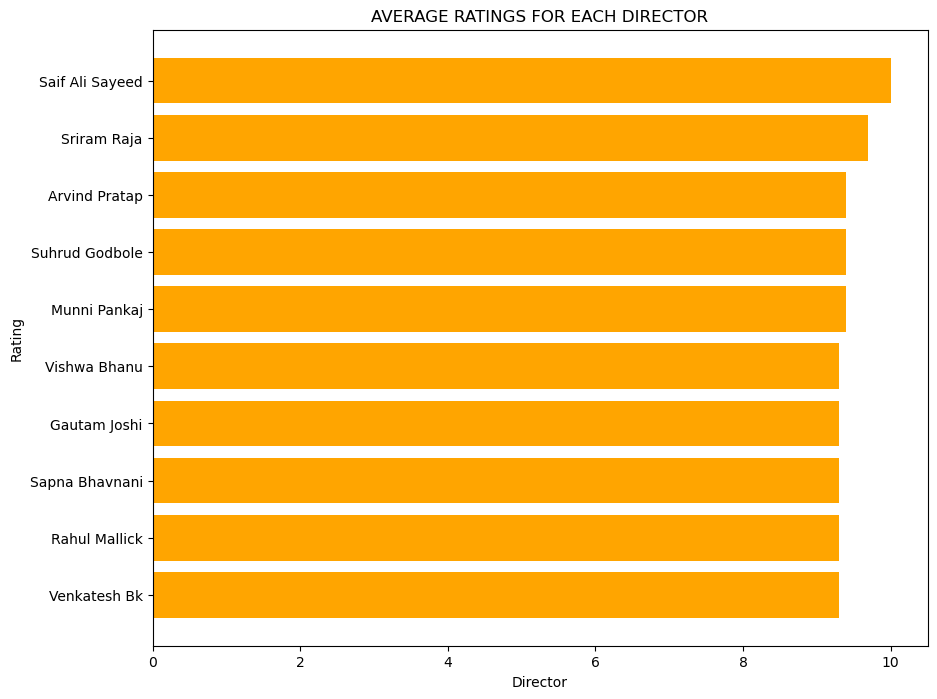

In [167]:
dset.drop(columns=['level_0'], inplace=True)
dset.reset_index(inplace=True)
avg_rating=dset.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating)
fig=plt.figure(figsize=(10,8))
plt.barh(avg_rating.index,avg_rating.values,color="orange")
plt.xlabel('Director')
plt.ylabel('Rating')
plt.title("AVERAGE RATINGS FOR EACH DIRECTOR")
plt.gca().invert_yaxis()
plt.show()

FINDING UNIQUE VALUS FROM GENRE:

In [166]:
dset['Genre']

0                           Drama
1                 Comedy, Romance
2          Comedy, Drama, Musical
3       Horror, Mystery, Thriller
4         Action, Crime, Thriller
                  ...            
4477    Action, Adventure, Comedy
4478                        Drama
4479         Action, Crime, Drama
4480                Action, Drama
4481                Action, Drama
Name: Genre, Length: 4482, dtype: object

In [149]:
list1=[]
for values in dset['Genre']:
    if isinstance(values, str):  # Check if the value is a string
        list1.append(values.split(','))
    else:
        list1.append([])  
print(list1)

[['Drama'], ['Comedy', ' Romance'], ['Comedy', ' Drama', ' Musical'], ['Drama', ' Romance', ' War'], ['Horror', ' Mystery', ' Thriller'], ['Action', ' Crime', ' Thriller'], ['Drama'], ['Horror'], ['Horror', ' Romance', ' Thriller'], ['Comedy', ' Drama', ' Romance'], ['Comedy', ' Drama'], ['Comedy', ' Drama', ' Romance'], ['Crime', ' Drama', ' Mystery'], ['Horror', ' Thriller'], ['Comedy', ' Horror'], ['Drama', ' Horror', ' Mystery'], ['Drama'], ['Drama'], ['Action', ' Thriller'], ['Action'], ['Drama'], ['Horror', ' Mystery', ' Romance'], ['Horror', ' Mystery'], ['Drama', ' Horror', ' Romance'], ['Horror', ' Mystery', ' Romance'], ['Action', ' Drama', ' History'], ['Action', ' Drama', ' War'], ['Thriller'], ['Comedy'], ['Adventure', ' Horror', ' Mystery'], ['Action', ' Crime', ' Thriller'], ['Comedy', ' Drama', ' Romance'], ['Action', ' Sci-Fi'], ['Crime', ' Mystery', ' Thriller'], ['Comedy'], ['Thriller'], ['Drama', ' History'], ['Sport'], ['Biography', ' Drama', ' History'], ['Drama']

In [148]:
list2=[]
for item in list1:
    for item1 in item:
        list2.append(item1)
print(list2)

['Drama', 'Comedy', ' Romance', 'Comedy', ' Drama', ' Musical', 'Horror', ' Mystery', ' Thriller', 'Action', ' Crime', ' Thriller', 'Drama', 'Horror', 'Horror', ' Romance', ' Thriller', 'Comedy', ' Drama', ' Romance', 'Comedy', ' Drama', ' Romance', 'Crime', ' Drama', ' Mystery', 'Horror', ' Thriller', 'Comedy', ' Horror', 'Drama', 'Action', 'Drama', 'Thriller', 'Comedy', 'Adventure', ' Horror', ' Mystery', 'Action', ' Crime', ' Thriller', 'Crime', ' Mystery', ' Thriller', 'Comedy', 'Thriller', 'Drama', ' History', 'Sport', 'Biography', ' Drama', ' History', 'Drama', 'Horror', ' Romance', 'Comedy', ' Romance', 'Comedy', 'Drama', 'Adventure', ' Drama', 'Action', ' Drama', ' History', 'Drama', ' Romance', 'Crime', ' Thriller', 'Drama', 'Horror', 'Horror', 'Drama', 'Drama', ' Family', ' Musical', 'Thriller', 'Action', ' Comedy', 'Action', ' Adventure', ' Fantasy', 'Horror', 'Drama', 'Comedy', ' Drama', 'Action', 'Crime', ' Thriller', 'Documentary', 'Drama', ' Horror', ' Musical', 'Thrille

In [147]:
list3=[]
for item in list2:
    if item not in list3:
        list3.append(item)
print(list3)

['Drama', 'Comedy', ' Romance', ' Drama', ' Musical', 'Horror', ' Mystery', ' Thriller', 'Action', ' Crime', 'Crime', ' Horror', 'Thriller', 'Adventure', ' History', 'Sport', 'Biography', ' Family', ' Comedy', ' Adventure', ' Fantasy', 'Documentary', ' Biography', 'Mystery', 'Romance', ' Sci-Fi', 'Fantasy', 'Musical', ' Music', 'Sci-Fi', 'Family', 'History', 'Animation', ' Sport', ' Action', ' War', 'War', ' News', 'Music', ' Western']


FINDING HOW MANY FILMS OF EACH GENRE WERE MADE:

In [146]:
from collections import Counter
Counter(list2)

Counter({'Drama': 1568,
         ' Drama': 1275,
         'Action': 1167,
         ' Romance': 833,
         'Comedy': 621,
         ' Thriller': 405,
         ' Crime': 380,
         ' Family': 316,
         ' Musical': 218,
         ' Comedy': 203,
         'Crime': 198,
         ' Mystery': 174,
         'Romance': 155,
         'Documentary': 126,
         ' Adventure': 118,
         'Horror': 104,
         'Thriller': 90,
         ' Fantasy': 86,
         'Adventure': 85,
         'Musical': 81,
         ' History': 61,
         'Family': 56,
         ' Horror': 55,
         'Animation': 52,
         'Mystery': 51,
         'Biography': 47,
         ' Action': 34,
         ' Music': 30,
         'Fantasy': 29,
         ' Biography': 25,
         ' Sci-Fi': 19,
         ' War': 18,
         ' Sport': 14,
         'History': 9,
         'Sci-Fi': 4,
         'War': 3,
         'Music': 3,
         'Sport': 2,
         ' News': 2,
         ' Western': 2})

FEATURE ENGINEERING:

In [143]:
dset_sorted=dset.sort_values(by='Votes', ascending=False)
dset_sorted['vote_count_percentile']=dset_sorted['Votes'].rank(pct=True)*100
dset_sorted.reset_index(drop=True, inplace=True)
print(dset_sorted[['Name','Votes','vote_count_percentile']])

                                      Name  Votes  vote_count_percentile
0     Satyam Shivam Sundaram: Love Sublime    999             100.000000
1                               Hera Pheri    998              99.982909
2                              Kurukshetra    996              99.965818
3                                  Mazdoor     99              99.905999
4                                    Login     99              99.905999
...                                    ...    ...                    ...
5846                                 Fugly  1,008               0.085455
5847                  Daud: Fun on the Run  1,006               0.059819
5848                 Love Breakups Zindagi  1,006               0.059819
5849                      Patthar Ke Phool  1,004               0.034182
5850                        15 Park Avenue  1,002               0.017091

[5851 rows x 3 columns]


In [144]:
dset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [145]:
dset=dset.dropna(subset=['Votes'])
dset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


SPLITTING THE DATASET INTO 2 PARTS (TRAINING - 80% , TESTING - 20%)

In [142]:
dset['Year']=dset['Year'].astype(str)
dset['Duration']=dset['Duration'].astype(str)
dset['Year']=dset['Year'].str.extract('(\d+)').astype(float)
dset['Duration']=dset['Duration'].str.extract('(\d+)').astype(float)
x=dset[['Year','Duration','Votes']]
y=dset['Rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

MODEL TRAINING (USING LINEAR REGRESSION):

In [141]:
model=LinearRegression()

In [140]:
model.fit(x_train,y_train)

LinearRegression()

MODEL TESTING AND MODEL PREDICTION:

In [139]:
y_prediction=model.predict(x_test)

In [138]:
mean_a=mean_absolute_error(y_test,y_prediction)
mean_s=mean_squared_error(y_test,y_prediction,squared=False)
r2s=r2_score(y_test,y_prediction)
print("Mean Absolute Error : ",mean_a)
print("Root Mean Squared Error : ",mean_s)
print("R-Squared Score : ",r2s)

Mean Absolute Error :  3.6071247130281834
Root Mean Squared Error :  4.292973188745227
R-Squared Score :  -1.372226945705299


VISUALIZING THE PREDICTION RESULTS:

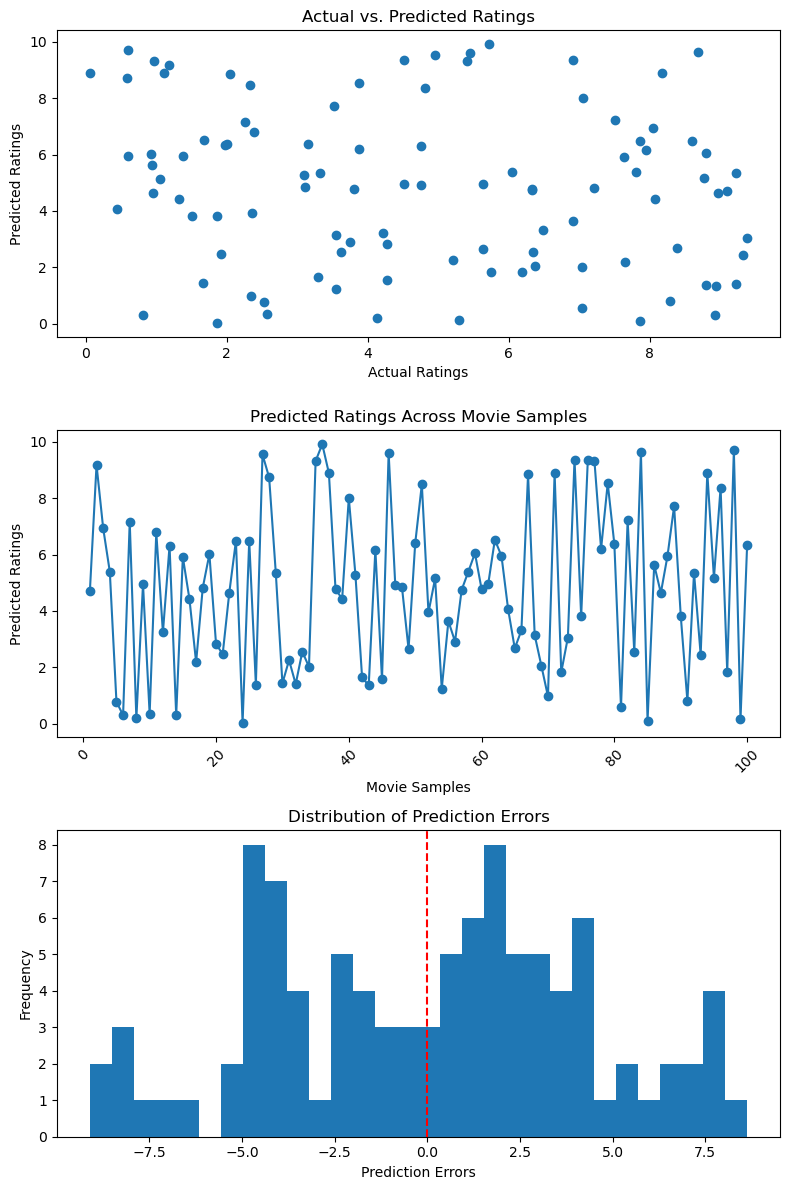

In [137]:
y_test=np.random.rand(100)*10
y_prediction=np.random.rand(100)*10
errors=y_test-y_prediction
fig,axs=plt.subplots(3,1,figsize=(8,12))

axs[0].scatter(y_test,y_prediction)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")

movie_samples=np.arange(1,len(y_prediction)+1)
axs[1].plot(movie_samples,y_prediction,marker='o',linestyle='-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis='x',rotation=45)

axs[2].hist(errors,bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()